<a href="https://colab.research.google.com/github/LoopGlitch26/Machine-Learning-Projects/blob/main/PersonalityTypes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install -q kaggle

In [13]:
from google.colab import files

files.upload()

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d tunguz/big-five-personality-test

 96% 153M/159M [00:01<00:00, 93.5MB/s]
100% 159M/159M [00:01<00:00, 110MB/s] 


In [ ]:
!ls

big-five-personality-test.zip  kaggle.json  sample_data


In [ ]:
!unzip \*.zip

In [ ]:
from google.colab import files
uploaded = files.upload()

In [1]:
import pandas as pd

df = pd.read_csv('data-final.csv', delimiter="\t")

In [2]:
df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,...,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,...,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6.0,1.0,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,...,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11.0,1.0,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,...,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7.0,1.0,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,...,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7.0,1.0,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,...,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17.0,2.0,KE,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422821,2.0,4.0,2.0,4.0,2.0,4.0,4.0,4.0,2.0,5.0,3.0,5.0,2.0,2.0,4.0,1.0,2.0,2.0,3.0,4.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,4.0,2.0,4.0,...,18544.0,5075.0,4575.0,5577.0,3938.0,2384.0,4137.0,4678.0,8931.0,4493.0,1712.0,2124.0,2338.0,4089.0,2308.0,5437.0,3764.0,2047.0,2617.0,3708.0,2754.0,4876.0,3280.0,5266.0,16249.0,6597.0,9864.0,2722.0,2670.0,873.0,2017-05-22 05:08:14,1280.0,854.0,19.0,231.0,38.0,1.0,AU,-27.0,133.0
422822,3.0,1.0,5.0,3.0,5.0,3.0,0.0,2.0,3.0,4.0,3.0,5.0,4.0,4.0,4.0,1.0,3.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,2.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,3.0,5.0,5.0,3.0,1.0,1.0,5.0,...,6414.0,6376.0,2890.0,5288.0,4170.0,3013.0,6809.0,5046.0,2889.0,3638.0,4866.0,8389.0,5983.0,3153.0,2841.0,3214.0,4502.0,3476.0,7425.0,3767.0,4130.0,8914.0,5550.0,5780.0,1803.0,3808.0,2829.0,4865.0,4433.0,4352.0,2017-05-22 05:08:56,1093.0,615.0,31.0,221.0,22.0,1.0,US,43.3653,-72.1734


In [3]:
columns = df.columns

In [4]:
for column in columns:
    print(column)

EXT1
EXT2
EXT3
EXT4
EXT5
EXT6
EXT7
EXT8
EXT9
EXT10
EST1
EST2
EST3
EST4
EST5
EST6
EST7
EST8
EST9
EST10
AGR1
AGR2
AGR3
AGR4
AGR5
AGR6
AGR7
AGR8
AGR9
AGR10
CSN1
CSN2
CSN3
CSN4
CSN5
CSN6
CSN7
CSN8
CSN9
CSN10
OPN1
OPN2
OPN3
OPN4
OPN5
OPN6
OPN7
OPN8
OPN9
OPN10
EXT1_E
EXT2_E
EXT3_E
EXT4_E
EXT5_E
EXT6_E
EXT7_E
EXT8_E
EXT9_E
EXT10_E
EST1_E
EST2_E
EST3_E
EST4_E
EST5_E
EST6_E
EST7_E
EST8_E
EST9_E
EST10_E
AGR1_E
AGR2_E
AGR3_E
AGR4_E
AGR5_E
AGR6_E
AGR7_E
AGR8_E
AGR9_E
AGR10_E
CSN1_E
CSN2_E
CSN3_E
CSN4_E
CSN5_E
CSN6_E
CSN7_E
CSN8_E
CSN9_E
CSN10_E
OPN1_E
OPN2_E
OPN3_E
OPN4_E
OPN5_E
OPN6_E
OPN7_E
OPN8_E
OPN9_E
OPN10_E
dateload
screenw
screenh
introelapse
testelapse
endelapse
IPC
country
lat_appx_lots_of_err
long_appx_lots_of_err


In [15]:
import numpy as np

In [16]:
X = df[df.columns[0:50]]

In [17]:
pd.set_option('display.max_columns', None)

In [8]:
X

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422821,2.0,4.0,2.0,4.0,2.0,4.0,4.0,4.0,2.0,5.0,3.0,5.0,2.0,2.0,4.0,1.0,2.0,2.0,3.0,4.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,4.0,2.0,4.0,4.0,3.0,4.0,1.0,3.0,2.0,4.0,3.0,5.0,5.0
422822,3.0,1.0,5.0,3.0,5.0,3.0,0.0,2.0,3.0,4.0,3.0,5.0,4.0,4.0,4.0,1.0,3.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,2.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,3.0,5.0,5.0,3.0,1.0,1.0,5.0,2.0,3.0,3.0,3.0,5.0,1.0,2.0,1.0,4.0,5.0
422823,4.0,2.0,4.0,1.0,4.0,2.0,2.0,2.0,4.0,4.0,2.0,3.0,4.0,2.0,4.0,3.0,3.0,3.0,3.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,3.0,3.0,3.0,1.0,4.0,4.0,4.0,3.0,2.0,2.0,2.0,1.0,3.0,3.0,2.0,5.0,1.0,4.0,1.0,4.0,3.0,4.0,4.0
422824,4.0,2.0,4.0,4.0,2.0,2.0,5.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,1.0,5.0,4.0,4.0,3.0,3.0,1.0,4.0,2.0,5.0,1.0,5.0,1.0,4.0,1.0,5.0,4.0,3.0,4.0,3.0,2.0,3.0,5.0,2.0,4.0,4.0,5.0,2.0,4.0,1.0,0.0,1.0,5.0,5.0,5.0,5.0


In [9]:
X = X.fillna(0)

In [10]:
from sklearn.cluster import MiniBatchKMeans

In [11]:
kmeans = MiniBatchKMeans(n_clusters=10, random_state=0, batch_size=100, max_iter=100).fit(X)

In [18]:
len(kmeans.cluster_centers_)

10

In [19]:
one = kmeans.cluster_centers_[0]

In [20]:
two = kmeans.cluster_centers_[1]

In [21]:
three =kmeans.cluster_centers_[2]

In [22]:
four = kmeans.cluster_centers_[3]

In [23]:
five =kmeans.cluster_centers_[4]

In [24]:
six = kmeans.cluster_centers_[5]

In [25]:
seven = kmeans.cluster_centers_[6]

In [26]:
eight = kmeans.cluster_centers_[7]

In [27]:
nine= kmeans.cluster_centers_[8]

In [28]:
ten = kmeans.cluster_centers_[9]

In [29]:
one

array([3.72633761, 1.65993705, 3.9267291 , 2.18887695, 4.18465495,
       1.65410302, 3.91567514, 2.38727259, 4.14224303, 2.66730636,
       3.50445229, 3.21125355, 3.98982882, 2.55404161, 3.17640286,
       3.29834191, 3.80056805, 3.41851539, 3.64919014, 2.97700929,
       2.49992324, 4.20392262, 3.2058801 , 3.83269364, 2.2459891 ,
       3.61587472, 1.98126967, 3.65606049, 3.80267905, 3.73819759,
       2.46699163, 4.02579258, 3.57783834, 3.6266984 , 1.79081907,
       4.00537346, 2.97263376, 3.1714516 , 2.35004222, 3.21175251,
       3.84413142, 2.03680817, 4.34324864, 1.93367621, 4.04037768,
       1.6592078 , 4.01239733, 3.504222  , 4.05139326, 4.30252552])

In [30]:
one_scores = {}

one_scores['extroversion_score'] =  one[0] - one[1] + one[2] - one[3] + one[4] - one[5] + one[6] - one[7] + one[8] - one[9]
one_scores['neuroticism_score'] =  one[0] - one[1] + one[2] - one[3] + one[4] + one[5] + one[6] + one[7] + one[8] + one[9]
one_scores['agreeableness_score'] =  -one[0] + one[1] - one[2] + one[3] - one[4] - one[5] + one[6] - one[7] + one[8] + one[9]
one_scores['conscientiousness_score'] =  one[0] - one[1] + one[2] - one[3] + one[4] - one[5] + one[6] - one[7] + one[8] + one[9]
one_scores['openness_score'] =  one[0] - one[1] + one[2] - one[3] + one[4] - one[5] + one[6] + one[7] + one[8] + one[9]

In [31]:
one_scores

{'agreeableness_score': -1.3050587241882021,
 'conscientiousness_score': 14.672756582482528,
 'extroversion_score': 9.338143855070228,
 'neuroticism_score': 22.755507791509917,
 'openness_score': 19.44730175788744}

In [32]:
all_types = {'one':one, 'two': two, 'three' :three, 'four':four, 'five':five, 'six': six, 'seven': seven, 'eight': eight,
             'nine': nine, 'ten': ten}

all_types_scores ={}

for name, personality_type in all_types.items():
    personality_trait = {}

    personality_trait['extroversion_score'] =  personality_type[0] - personality_type[1] +personality_type[2] - personality_type[3] + personality_type[4] - personality_type[5] +personality_type[6] - personality_type[7] + personality_type[8] -personality_type[9]
    personality_trait['neuroticism_score'] =  personality_type[0] - personality_type[1] + personality_type[2] -personality_type[3] + personality_type[4] + personality_type[5] + personality_type[6] + personality_type[7] + personality_type[8] + personality_type[9]
    personality_trait['agreeableness_score'] =  -personality_type[0] +personality_type[1] - personality_type[2] + personality_type[3] - personality_type[4] - personality_type[5] + personality_type[6] - personality_type[7] + personality_type[8] + personality_type[9]
    personality_trait['conscientiousness_score'] = personality_type[0] - personality_type[1] + personality_type[2] -personality_type[3] +personality_type[4] - personality_type[5] +personality_type[6] -personality_type[7] + personality_type[8] + personality_type[9]
    personality_trait['openness_score'] =  personality_type[0] -personality_type[1] + personality_type[2] - personality_type[3] + personality_type[4] - personality_type[5] +personality_type[6] + personality_type[7] + personality_type[8] + personality_type[9]
    
    all_types_scores[name] = personality_trait

In [33]:
all_types_scores

{'eight': {'agreeableness_score': -0.9622324557592643,
  'conscientiousness_score': 8.911431633214585,
  'extroversion_score': 2.153300315694965,
  'neuroticism_score': 20.2224056535465,
  'openness_score': 15.444116198916792},
 'five': {'agreeableness_score': 1.554206793149219,
  'conscientiousness_score': 0.1810449224381525,
  'extroversion_score': -8.62213828498935,
  'neuroticism_score': 14.954933394844584,
  'openness_score': 8.727899198431457},
 'four': {'agreeableness_score': -0.686824075646908,
  'conscientiousness_score': 8.794292508917957,
  'extroversion_score': 2.2133514523526454,
  'neuroticism_score': 19.939471151123946,
  'openness_score': 15.116924296472446},
 'nine': {'agreeableness_score': -0.31851851851851803,
  'conscientiousness_score': 0.4821869488536146,
  'extroversion_score': 0.2656084656084648,
  'neuroticism_score': 0.849735449735449,
  'openness_score': 0.6423280423280415},
 'one': {'agreeableness_score': -1.3050587241882021,
  'conscientiousness_score': 14.

In [34]:
all_extroversion = []
all_neuroticism =[]
all_agreeableness =[]
all_conscientiousness =[]
all_openness =[]

for personality_type, personality_trait in all_types_scores.items():
    all_extroversion.append(personality_trait['extroversion_score'])
    all_neuroticism.append(personality_trait['neuroticism_score'])
    all_agreeableness.append(personality_trait['agreeableness_score'])
    all_conscientiousness.append(personality_trait['conscientiousness_score'])
    all_openness.append(personality_trait['openness_score'])


In [35]:
all_extroversion_normalized = (all_extroversion-min(all_extroversion))/(max(all_extroversion)-min(all_extroversion))
all_neuroticism_normalized = (all_neuroticism-min(all_neuroticism))/(max(all_neuroticism)-min(all_neuroticism))
all_agreeableness_normalized = (all_agreeableness-min(all_agreeableness))/(max(all_agreeableness)-min(all_agreeableness))
all_conscientiousness_normalized = (all_conscientiousness-min(all_conscientiousness))/(max(all_conscientiousness)-min(all_conscientiousness))
all_openness_normalized = (all_openness-min(all_openness))/(max(all_openness)-min(all_openness))

In [36]:
all_extroversion_normalized

array([1.        , 0.77544696, 0.19934672, 0.63059575, 0.06880029,
       0.12780698, 0.        , 0.62748223, 0.52960971, 0.98234338])

In [37]:
counter = 0

normalized_all_types_scores ={}

for personality_type, personality_trait in all_types_scores.items():
    normalized_personality_trait ={}
    normalized_personality_trait['extroversion_score'] = all_extroversion_normalized[counter]
    normalized_personality_trait['neuroticism_score'] = all_neuroticism_normalized[counter]
    normalized_personality_trait['agreeableness_score'] = all_agreeableness_normalized[counter]
    normalized_personality_trait['conscientiousness_score'] = all_conscientiousness_normalized[counter]
    normalized_personality_trait['openness_score'] = all_openness_normalized[counter]
    
    normalized_all_types_scores[personality_type] = normalized_personality_trait
    
    counter+=1

In [38]:
normalized_all_types_scores

{'eight': {'agreeableness_score': 0.312470625828455,
  'conscientiousness_score': 0.6281563810991859,
  'extroversion_score': 0.6274822306078797,
  'neuroticism_score': 0.8843637148034825,
  'openness_score': 0.7829487099092494},
 'five': {'agreeableness_score': 0.8283553288785911,
  'conscientiousness_score': 0.06468554452518255,
  'extroversion_score': 0.06880028718761952,
  'neuroticism_score': 0.6439032472829281,
  'openness_score': 0.427690724835341},
 'four': {'agreeableness_score': 0.368930947870169,
  'conscientiousness_score': 0.6205960653251442,
  'extroversion_score': 0.6305957452383075,
  'neuroticism_score': 0.8714477354895281,
  'openness_score': 0.7656417146191216},
 'nine': {'agreeableness_score': 0.4444357322806447,
  'conscientiousness_score': 0.08412165373469317,
  'extroversion_score': 0.5296097086190358,
  'neuroticism_score': 0.0,
  'openness_score': 0.0},
 'one': {'agreeableness_score': 0.2421892440057219,
  'conscientiousness_score': 1.0,
  'extroversion_score':

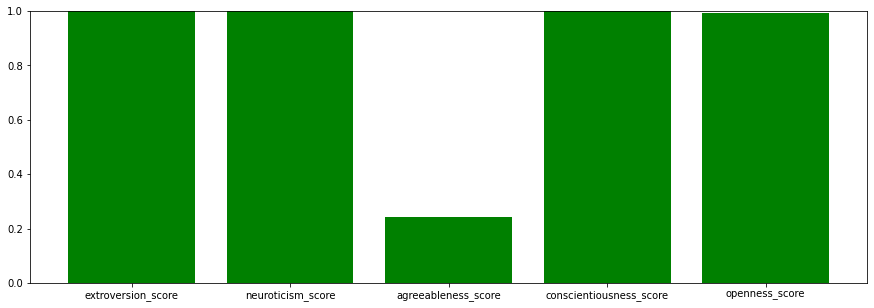

In [39]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['one'].keys()), normalized_all_types_scores['one'].values(), color='g')
plt.show()

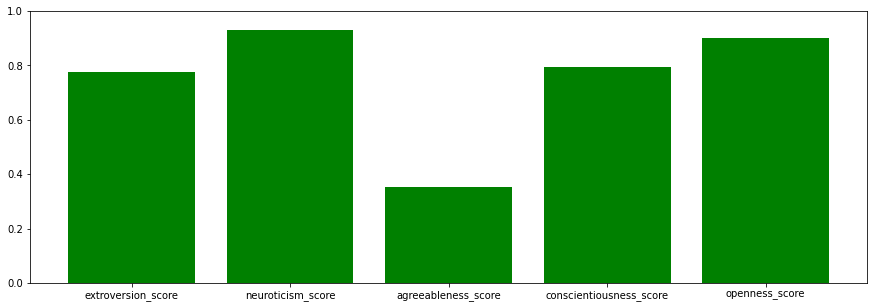

In [40]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['two'].keys()), normalized_all_types_scores['two'].values(), color='g')
plt.show()

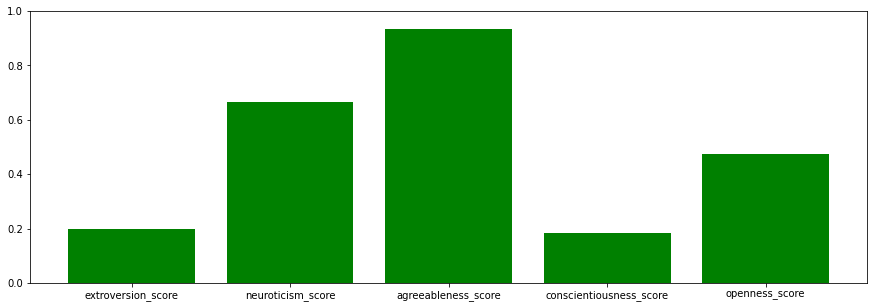

In [41]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['three'].keys()), normalized_all_types_scores['three'].values(), color='g')
plt.show()

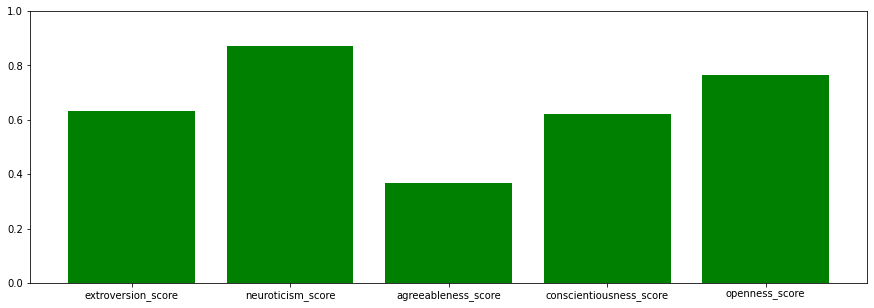

In [42]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['four'].keys()), normalized_all_types_scores['four'].values(), color='g')
plt.show()

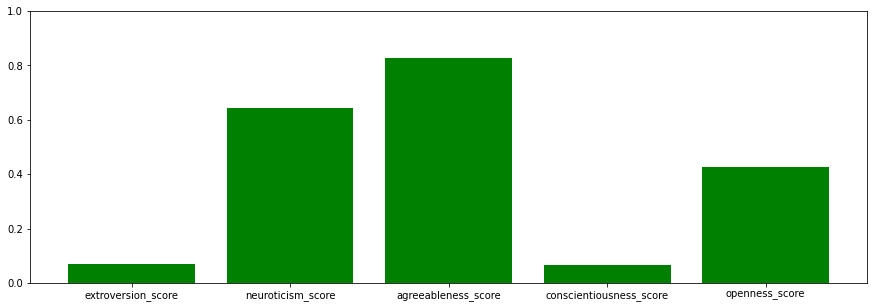

In [43]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['five'].keys()), normalized_all_types_scores['five'].values(), color='g')
plt.show()

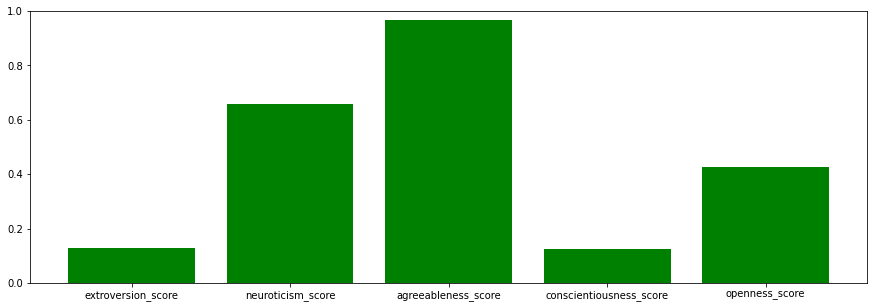

In [44]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['six'].keys()), normalized_all_types_scores['six'].values(), color='g')
plt.show()

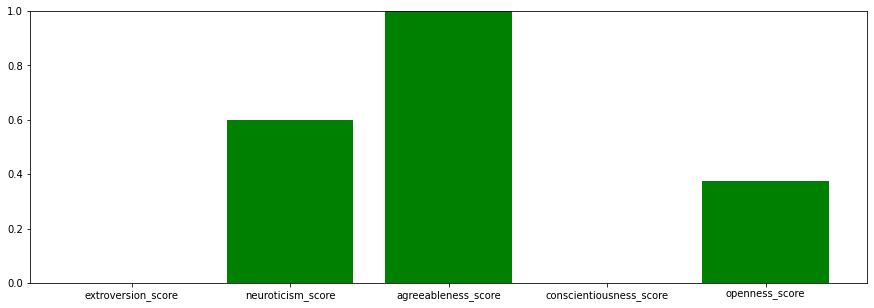

In [45]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['seven'].keys()), normalized_all_types_scores['seven'].values(), color='g')
plt.show()

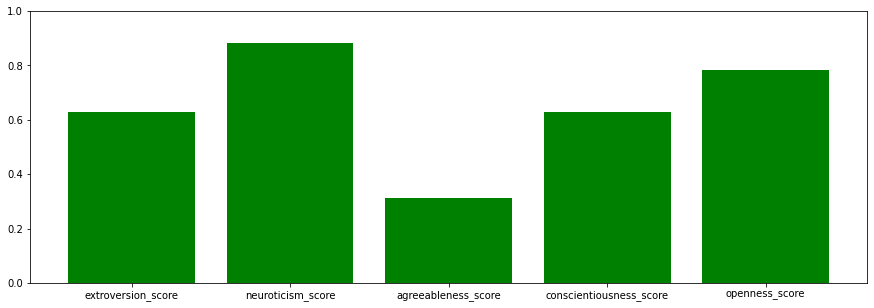

In [46]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['eight'].keys()), normalized_all_types_scores['eight'].values(), color='g')
plt.show()

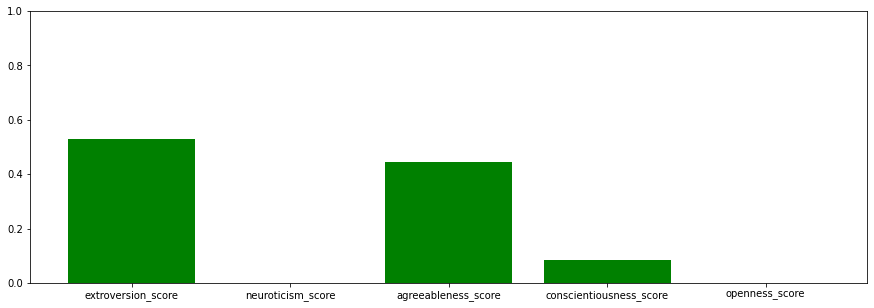

In [47]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['nine'].keys()), normalized_all_types_scores['nine'].values(), color='g')
plt.show()

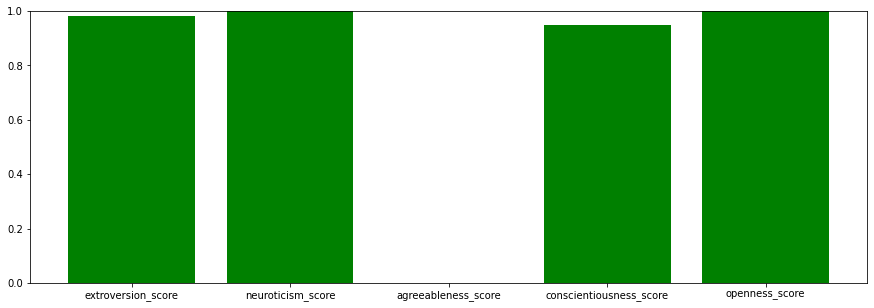

In [48]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['ten'].keys()), normalized_all_types_scores['ten'].values(), color='g')
plt.show()